<a href="https://colab.research.google.com/github/MunySafitri/Retrieval_Information/blob/main/NVIDIA_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1: An Introduction to Deep Learning**

Notes :

In AI, we not only learn how robotics think, but we can also pick up a few tricks to help humans be more efficient learners too

Like a video game, free to make mistake and learn from it too

Human vs Machine Learning

**Human**       ,       **Machine**

Rest and Digest  ,  Training

Fight-or-flight  ,  Prediction

"Von Neuemann architecture"
"Deep Blue" - example of expert system"
"Automated Decision Making"
"Popular learning technique : trial and error" 
"Computer Vision"

Deep learning flips traditional programming on its head

Normally to build classifier in machine learning :
1.   Define a set of rules for classification
2.   Program those rules into the computer
3.   Feed it examples, and the program uses the rules to classify

Bu Afia : "gak semua harus menggunakan deep learning", (andaikata kita udah bisa pakai serok buat gali tanah untuk pup kucing, maka kita gaperlu pakai cangkul, begitu juga dengan deep learning, kalo pake cara sederhana bisa, ga usah pake deep learning krn lumayan juga)

Computer Vision :
Robotics and manufacturing, object detection, self driving cars

NLP :
Real time translation, voice recognition, virtual assistant

Recomender system :
Content curation, targeted advertizing, shopping recommendations

Reinforcement learning :
Alphago beats world champion in go, AI bots beats professional videogamers, stock trading robots



In [ ]:
# clear the GPU memory
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

### 01_mnist.ipynb : Image Classification with the MNIST Dataset
classify an image to a correct class

In [ ]:
# Loading the Data Into Memory (with Keras)
from tensorflow.keras.datasets import mnist

# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_valid.shape

(10000, 28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

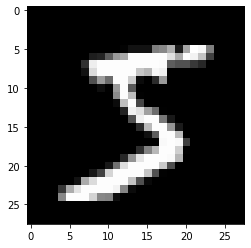

In [ ]:
# melihat image dg matpotlib

import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

In [ ]:
# label dari image tadi

y_train[0]


5

In [ ]:
# Flattening the Image Data
# reshape each image into a single array of 784 continuous pixels (note: 28x28 = 784). This is also called flattening the image.
# from 3d (60000-jml image, 28, 28 - dimensi image) to 2d (60000, 784(28x28)) --> array
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [ ]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
# Normalizing the Image Data
# Converting integer values to floating point values between 0 and 1 is called normalization
x_train = x_train / 255
x_valid = x_valid / 255 

print("x_train.dtype : ",x_train.dtype)
print("x_train.min() : ", x_train.min())
print("x_train.max() : ",x_train.max())


x_train.dtype :  float64
x_train.min() :  0.0
x_train.max() :  1.0


In [ ]:
# Categorically Encoding the Labels
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [ ]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# Creating the Model
# Instantiating the Model
from tensorflow.keras.models import Sequential

model = Sequential()

In [ ]:
# Creating the Input Layer
from tensorflow.keras.layers import Dense

In [ ]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

In [ ]:
# Creating the Hidden Layer
model.add(Dense(units = 512, activation='relu'))

In [ ]:
# Creating the Output Layer
model.add(Dense(units = 10, activation='softmax'))

In [ ]:
# Summarizing the Model
# readable summary of a model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the Model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the Model
# (fitting a model to data)
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1920 - accuracy: 0.9428 - val_loss: 0.1147 - val_accuracy: 0.9697
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1014 - accuracy: 0.9732 - val_loss: 0.1087 - val_accuracy: 0.9764
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0851 - accuracy: 0.9796 - val_loss: 0.1449 - val_accuracy: 0.9720
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0741 - accuracy: 0.9833 - val_loss: 0.1162 - val_accuracy: 0.9772
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0669 - accuracy: 0.9859 - val_loss: 0.1447 - val_accuracy: 0.9795


# Exercise

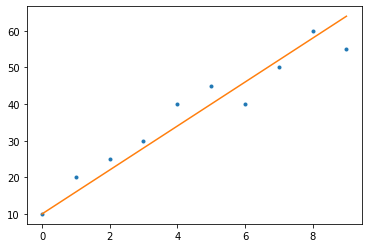

Loss: 21.5


In [ ]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

m = 6  # -2 to start, change me please
b = 10  # 40 to start, change me please

# Sample data
x = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])
y_hat = x * m + b

plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()

# y = x*m + b
# 10 = 0*m + b -- 10 = b
# 20 = 1*m + b -- 20 = m + b
# ----------------------------
# 20 = m + 10
#  m = 10, b = 10
# overfitting wkwk, cuman 2 data awal yg diambil

# mari kita coba data awal dan akhir
# y = x*m + b
# 10 = 0*m + b -- 10 = b
# 55 = 9*m + b -- 55 = 9m + b
# ----------------------------
# 9m = 45
# m = 5, b = 10
# Loss: 40.0

# mari kita coba data awal dan akhir
# y = x*m + b
# 10 = 0*m + b -- 10 = b
# 58 = 9*m + b -- 58 = 9m + b
# ----------------------------
# 9m = 48
# m = 6,44, b = 10
# Loss: 40.0

# m = 6, b = 10
# Loss: 21.5

# mari kita coba data awal dan akhir
# y = x*m + b
# 12 = 0*m + b -- 12 = b
# 56 = 9*m + b -- 56 = 9m + b
# ----------------------------
# 9m = 44
# m = 4,88, b = 12
# Loss: 

print("Loss:", np.sum((y - y_hat)**2)/len(x))

# **2: The Theory Behind Neural Networks**

Recap last material


1.   Loaded and visualized our data
2.   Edited our data (reshaped, normalized, to categorical)
3. Create model
4. Compiled model
5. Trained the model on our data

"Traditional regression"

If we use too big model, we can wasting a lot of computational resources an take longer to train

Training vs validation data

"loss function, cost function"

The error function that we used to calculate our gradient descent
Is called the loss function or cost function

CROSS ENT : y hat is our prediction that a point is blue
And y actual is whether a point was actually blue or not
The logarithms are what will push our code to Infinity
as log(0) is negative infinity





### Image Classification of an American Sign Language Dataset

Reading in the Data

In [ ]:
import pandas as pd #to work and load the csv dataset, for loading and manipulating data

train_df = pd.read_csv("sample_data/sign_mnist_train.csv")
valid_df = pd.read_csv("sample_data/sign_mnist_valid.csv")

Exploring the data

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Extracting the labels

In [ ]:
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label'] #delete the label from original database
del valid_df['label']

Extracting the Images

In [ ]:
x_train = train_df.values
x_valid = valid_df.values

Summarizing the training and validation data

In [ ]:
x_train.shape
# now we have 27.455 images dengan 784 pixels each for training

(27455, 784)

In [ ]:
y_train.shape

(27455,)

In [ ]:
# for validation we have 7172 image
x_valid.shape

(7172, 784)

In [ ]:
y_valid.shape

(7172,)

Visualizing the data

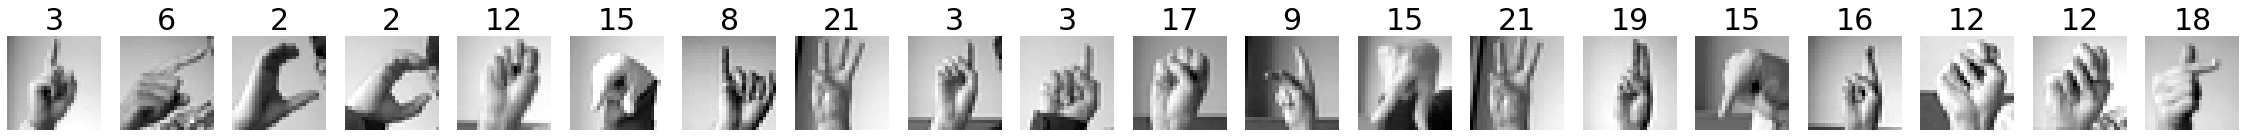

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

**Excercise : Normalize the image data**

In [ ]:
x_train.min()

0

In [ ]:
x_train.max()

255

In [ ]:
# TODO: Normalize x_train and x_valid.

x_train = x_train/255
x_valid = x_valid/255

print("x_train.dtype : ",x_train.dtype)
print("x_train.min() : ", x_train.min())
print("x_train.max() : ",x_train.max())

# print(" x_train : ")
# x_train.shape
# print(" y_train : ")
# x_valid.shape

x_train.dtype :  float64
x_train.min() :  0.0
x_train.max() :  6.030862941101084e-08


**Exercise : Categorize the labels**

In [ ]:
import tensorflow.keras as keras
num_classes = 24

In [ ]:
# TODO: Categorically encode y_train and y_valid.

y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

**Exercise : Build the Model**

In [ ]:
# Creating the Model
# Instantiating the Model
from tensorflow.keras.models import Sequential

model = Sequential()

In [ ]:
# Creating the Input Layer
from tensorflow.keras.layers import Dense

In [ ]:
# Dense input layer
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

In [ ]:
# Creating the Hidden Layer
model.add(Dense(units = 512, activation='relu'))

In [ ]:
# Creating the Output Layer
model.add(Dense(units = num_classes, activation='softmax'))

**Summarizing the Model**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
 dense_3 (Dense)             (None, 24)                264       
                                                                 
Total params: 669,970
Trainable params: 669,970
Non-trainable params: 0
_________________________________________________________________


**Compiling the Models**

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

**Exercise : Train the Models**

Terjadinya overfit, tertatu baik untuk training data, namun buruk untuk testing

In [ ]:
# TODO: Train the model for 20 epochs.
history = model.fit(
    x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/20
858/858 [==============================] - 13s 13ms/step - loss: 1.3922 - accuracy: 0.9860 - val_loss: 4.1088 - val_accuracy: 0.0462
Epoch 2/20
858/858 [==============================] - 10s 12ms/step - loss: 0.1262 - accuracy: 1.0000 - val_loss: 6.9007 - val_accuracy: 0.0462
Epoch 3/20
858/858 [==============================] - 11s 12ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 10.0403 - val_accuracy: 0.0462
Epoch 4/20
858/858 [==============================] - 14s 17ms/step - loss: 1.8730e-04 - accuracy: 1.0000 - val_loss: 13.1535 - val_accuracy: 0.0462
Epoch 5/20
858/858 [==============================] - 11s 12ms/step - loss: 7.7207e-06 - accuracy: 1.0000 - val_loss: 15.7902 - val_accuracy: 0.0462
Epoch 6/20
858/858 [==============================] - 11s 13ms/step - loss: 6.1023e-07 - accuracy: 1.0000 - val_loss: 17.4697 - val_accuracy: 0.0462
Epoch 7/20
858/858 [==============================] - 10s 12ms/step - loss: 1.0421e-07 - accuracy: 1.0000 - val_loss: 18

# **3: Convolutional Neural Networks**

**Loading and Preparing the Data**

In [ ]:
import tensorflow.keras as keras
import pandas as pd

# Load in our data from CSV files
train_df = pd.read_csv("sample_data/sign_mnist_train.csv")
valid_df = pd.read_csv("sample_data/sign_mnist_valid.csv")

# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate out our image vectors
x_train = train_df.values
x_valid = valid_df.values

# Turn our scalar targets into binary categories
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

Reshaping Images for a CNN

In [ ]:
x_train.shape, x_valid.shape

((27455, 784), (7172, 784))

In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [ ]:
x_valid.shape

(7172, 28, 28, 1)

In [ ]:
x_train.shape, x_valid.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

 Creating a Convolutional Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

Summarizing the model

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)      

Compiling the model

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

Training the model

In [ ]:
model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20
858/858 [==============================] - 118s 135ms/step - loss: 0.3183 - accuracy: 0.9027 - val_loss: 0.2589 - val_accuracy: 0.9156
Epoch 2/20
858/858 [==============================] - 115s 134ms/step - loss: 0.0206 - accuracy: 0.9936 - val_loss: 1.2487 - val_accuracy: 0.7658
Epoch 3/20
858/858 [==============================] - 116s 135ms/step - loss: 0.0097 - accuracy: 0.9970 - val_loss: 0.2001 - val_accuracy: 0.9476
Epoch 4/20
858/858 [==============================] - 113s 132ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.2226 - val_accuracy: 0.9505
Epoch 5/20
858/858 [==============================] - 114s 133ms/step - loss: 0.0065 - accuracy: 0.9983 - val_loss: 0.2558 - val_accuracy: 0.9477
Epoch 6/20
858/858 [==============================] - 116s 136ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.5155 - val_accuracy: 0.9257
Epoch 7/20
858/858 [==============================] - 116s 135ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.1853 -

It looks like this model is significantly improved! The training accuracy is very high, and the validation accuracy has improved as well. This is a great result, as all we had to do was swap in a new model.

In [ ]:
x_train.shape

(27455, 28, 28, 1)

# **4: Data Augmentation and Deployment**

In order to teach our model to be more robust when looking at new data, we're going to programmatically increase the size and variance in our dataset. This is known as data augmentation, a useful technique for many deep learning applications.

Preparing the data

In [ ]:
import tensorflow.keras as keras
import pandas as pd

# Load in our data from CSV files
train_df = pd.read_csv("sample_data/sign_mnist_train.csv")
valid_df = pd.read_csv("sample_data/sign_mnist_valid.csv")

# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate our our image vectors
x_train = train_df.values
x_valid = valid_df.values

# Turn our scalar targets into binary categories
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

# Reshape the image data for the convolutional network
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

Model Creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

**Data Augmentation**

Before compiling the model, it's time to set up our data augmentation.

Keras comes with an image augmentation class called ImageDataGenerator. We recommend checking out the documentation here. It accepts a series of options for augmenting your data. Later in the course, we'll have you select a proper augmentation strategy. For now, take a look at the options we've selected below, and then execute the cell to create an instance of the class:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  

Take a moment to think about why we would want to flip images horizontally, but not vertically. When you have an idea, reveal the text below.

Our dataset is pictures of hands signing the alphabet. If we want to use this model to classify hand images later, it's unlikely that those hands are going to be upside-down, but, they might be left-handed. This kind of domain-specific reasoning can help make good decisions for your own deep learning applications.

Batch Size

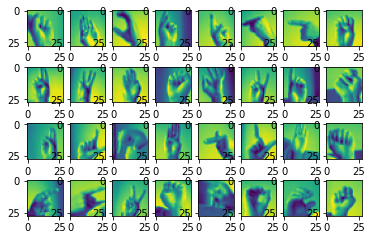

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

Fitting the Data to the Generator

In [ ]:
datagen.fit(x_train)

Compiling the Model

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

Training with Augmentation

In [ ]:
model.fit(img_iter,
          epochs=20,
          steps_per_epoch=len(x_train)/batch_size, # Run same number of steps we would if we were not using a generator.
          validation_data=(x_valid, y_valid))

Epoch 1/20
857/857 [==============================] - 126s 145ms/step - loss: 1.0849 - accuracy: 0.6499 - val_loss: 0.5384 - val_accuracy: 0.8009
Epoch 2/20
857/857 [==============================] - 123s 143ms/step - loss: 0.3238 - accuracy: 0.8890 - val_loss: 0.5042 - val_accuracy: 0.8509
Epoch 3/20
857/857 [==============================] - 124s 144ms/step - loss: 0.2061 - accuracy: 0.9325 - val_loss: 0.2271 - val_accuracy: 0.9314
Epoch 4/20
857/857 [==============================] - 122s 143ms/step - loss: 0.1548 - accuracy: 0.9495 - val_loss: 0.2126 - val_accuracy: 0.9311
Epoch 5/20
857/857 [==============================] - 124s 144ms/step - loss: 0.1292 - accuracy: 0.9591 - val_loss: 0.7303 - val_accuracy: 0.8402
Epoch 6/20
857/857 [==============================] - 122s 142ms/step - loss: 0.1169 - accuracy: 0.9631 - val_loss: 1.3253 - val_accuracy: 0.7612
Epoch 7/20
857/857 [==============================] - 123s 143ms/step - loss: 0.1073 - accuracy: 0.9659 - val_loss: 0.2057 -

Saving the Model

In [ ]:
model.save('asl_model')

**Summary:** 

In this section you used Keras to augment your dataset, the result being a trained model with less overfitting and excellent validation image results.

**Deploying ur Model**